# Parte 1: Primer Ejemplo - Modelo Básico con Datos

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Creación de los datos

In [2]:
data = {
    'text': [
        "Me encantó la película, fue maravillosa",
        "Terrible experiencia, no la recomiendo",
        "Muy buena actuación y gran dirección",
        "La trama fue aburrida y predecible",
        "Una obra maestra, me hizo llorar",
        "Pésimo servicio, perdí mi tiempo",
        "Los personajes fueron entrañables y reales",
        "Demasiado lenta, casi me duermo",
        "Excelente historia, muy bien contada",
        "No me gustó nada, malísima"
    ],
    'label': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # 1=Positivo, 0=Negativo
}

df = pd.DataFrame(data)

## Divide los datos de entrenamiento y prueba

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.3, random_state=42)


## Vectorización de Texto (TF-IDF)

In [4]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## Entrenamiento del modelo
Modelo Naive Bayes Multinomial

In [5]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

## Evaluación del modelo

In [6]:
y_pred = model.predict(X_test_tfidf)
report = classification_report(y_test, y_pred, output_dict=True)
cm = confusion_matrix(y_test, y_pred)

In [7]:
import pandas as pd
report_df = pd.DataFrame(report).transpose()
print(report_df)

              precision    recall  f1-score   support
0              1.000000  0.500000  0.666667  2.000000
1              0.500000  1.000000  0.666667  1.000000
accuracy       0.666667  0.666667  0.666667  0.666667
macro avg      0.750000  0.750000  0.666667  3.000000
weighted avg   0.833333  0.666667  0.666667  3.000000


## Matriz de confusión

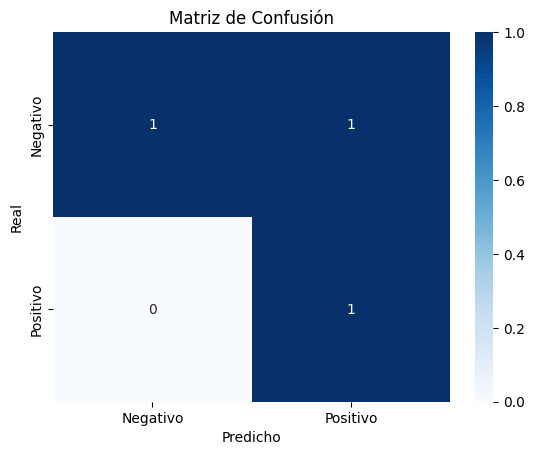

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Matriz de confusión ya calculada como `cm`
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

## Predicción con un nuevo texto

In [9]:
nuevo_texto = ["No me gustó la película, fue una pérdida de tiempo"]

nuevo_tfidf = vectorizer.transform(nuevo_texto)

prediccion = model.predict(nuevo_tfidf)[0]
etiqueta = "Positivo" if prediccion == 1 else "Negativo"

etiqueta


'Positivo'

# Segundo Ejemplo - Modelo Robusto con el Dataset IMDb

In [10]:
!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

!tar -xvzf aclImdb_v1.tar.gz


Se truncaron las últimas líneas 5000 del resultado de transmisión.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclIm

In [11]:
import os
import pandas as pd

def load_imdb_data(data_dir, subset="train"):
    texts, labels = [], []
    for label in ["pos", "neg"]:
        folder = os.path.join(data_dir, subset, label)
        for filename in os.listdir(folder):
            with open(os.path.join(folder, filename), encoding="utf-8") as f:
                texts.append(f.read())
                labels.append(1 if label == "pos" else 0)
    return pd.DataFrame({"text": texts, "label": labels})

# Cargar datos de entrenamiento (puedes hacer lo mismo con test)
df = load_imdb_data("aclImdb", subset="train")

# Mostrar ejemplo
df.head()


,text,label
0,Gurinda Chada's semi-autobiographical film (20...,1
1,The three main characters are very well portra...,1
2,"I saw this film on television years ago, but h...",1
3,Some unsuspecting films carry a message that r...,1
4,The music of Albeniz pervades this film. Once ...,1


In [12]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)


In [13]:
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [14]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      2485
           1       0.86      0.85      0.86      2515

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



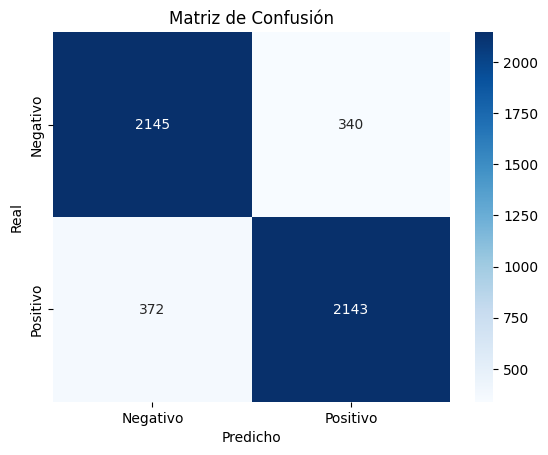

In [15]:
y_pred = model.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

In [16]:
nuevo = ["This movie was boring and too long"]
nuevo_vec = vectorizer.transform(nuevo)
pred = model.predict(nuevo_vec)[0]
print("Predicción:", "Positivo" if pred == 1 else "Negativo")


Predicción: Negativo


In [26]:
nuevo = ["Pinche película toda estúpida, la iré a ver de nuevo"]
nuevo_vec = vectorizer.transform(nuevo)
pred = model.predict(nuevo_vec)[0]
print("Predicción:", "Positivo" if pred == 1 else "Negativo")


Predicción: Positivo
